Compiling model...
'compile' took 0.006580 s

Training model...

Cause: could not parse the source code of <function <lambda> at 0x0000023E9ADD2280>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000023E9ADD2280>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Step      Train loss              Test loss               Test metric
0         [1.02e+00, 2.27e+00]    [1.02e+00, 2.27e+00]    []  
1000      [3.54e-03, 1.20e-02]    [2.87e-03, 1.20e-02]    []  
2000      [2.26e-03, 6.34e-03]    [1.89e-03, 6.34e-03]    []  
3000      [1.37e-03, 3.93e-03]    [1.15e-03, 3.93e-03]    []

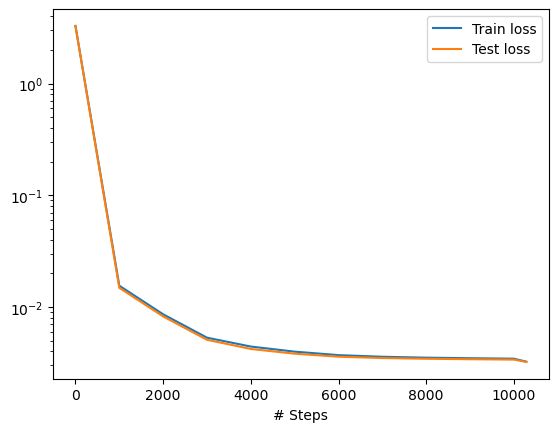

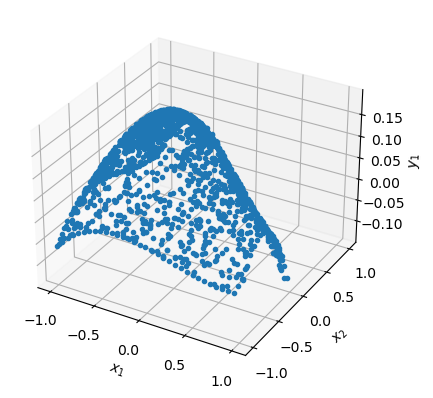

In [8]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import sys
sys.path.append('../../code')
import deepxde as dde
from deepxde.backend import tf
import numpy as np

def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0, component=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1, component=0)
    return -dy_xx - dy_yy - 1

def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
#net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
R = 10
net = dde.nn.random_FNN([2] + [200] + [1], "random_sin", "Glorot uniform",Rm=R, b=R/10)
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=10000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [11]:
print(losshistory.loss_test[-1])
print(losshistory.steps)

[7.1384682e-05 3.1481462e-03]
[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 10000, 10285]


In [21]:
def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0, component=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1, component=0)
    return -dy_xx - dy_yy - 1

def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)

#rr = [2, 4, 6, 8, 10]
R = 5
mm = [25, 50, 75, 100, 200]
loss = {}
for M in mm:
    #for R in rr:
        key = str(M) + ' ' + str(R)
        net = dde.nn.random_FNN([2] + [M] + [1], "random_sin", "Glorot uniform",Rm=R, b=R/10)
        model = dde.Model(data, net)

        model.compile("adam", lr=0.001)
        losshistory, train_state = model.train(iterations=10000)
        #model.compile("L-BFGS")
        #losshistory, train_state = model.train()
        loss[key] = [losshistory.loss_train[-1], losshistory.loss_test[-1], losshistory.steps[-1]]

Compiling model...
'compile' took 0.000502 s



Training model...

Cause: could not parse the source code of <function <lambda> at 0x0000023E9EC79310>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000023E9EC79310>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Step      Train loss              Test loss               Test metric
0         [1.36e+00, 2.29e+00]    [1.32e+00, 2.29e+00]    []  
1000      [2.14e-02, 3.78e-02]    [1.92e-02, 3.78e-02]    []  
2000      [3.92e-03, 7.35e-03]    [3.60e-03, 7.35e-03]    []  
3000      [2.69e-03, 5.94e-03]    [2.48e-03, 5.94e-03]    []  
4000      [1.97e-03, 4.39e-03]    [1.84e-03

In [22]:
print(loss)

{'25 5': [array([0.0003678 , 0.00307278], dtype=float32), array([0.00031677, 0.00307278], dtype=float32), 10000], '50 5': [array([0.00036156, 0.00306853], dtype=float32), array([0.00031286, 0.00306853], dtype=float32), 10000], '75 5': [array([0.00024422, 0.00307774], dtype=float32), array([0.00021088, 0.00307774], dtype=float32), 10000], '100 5': [array([0.00027149, 0.00306042], dtype=float32), array([0.00024034, 0.00306042], dtype=float32), 10000], '200 5': [array([0.00028031, 0.0030673 ], dtype=float32), array([0.00024331, 0.0030673 ], dtype=float32), 10000]}


In [25]:
def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0, component=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1, component=0)
    return -dy_xx - dy_yy - 1

def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)


#rr = [2, 4, 6, 8, 10]
R = 5
mm = [25, 50, 75, 100, 200]
loss = {}
for M in mm:
    data = dde.data.PDE(geom, pde, bc, num_domain=1000 + M*15, num_boundary=120, num_test=1500 + M*15)
#for R in rr:
    key = str(M) + ' ' + str(R)
    net = dde.nn.random_FNN([2] + [M] + [1], "random_sin", "Glorot uniform",Rm=R, b=R/10)
    model = dde.Model(data, net)

    model.compile("adam", lr=0.001)
    losshistory, train_state = model.train(iterations=10000)
    #model.compile("L-BFGS")
    #losshistory, train_state = model.train()
    loss[key] = [losshistory.loss_train[-1], losshistory.loss_test[-1], losshistory.steps[-1]]

Compiling model...
'compile' took 0.000352 s



Training model...

Cause: could not parse the source code of <function <lambda> at 0x0000023E9AC99550>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000023E9AC99550>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Step      Train loss              Test loss               Test metric
0         [1.33e+00, 2.36e+00]    [1.32e+00, 2.36e+00]    []  
1000      [2.45e-02, 4.03e-02]    [2.00e-02, 4.03e-02]    []  
2000      [3.38e-03, 6.22e-03]    [2.78e-03, 6.22e-03]    []  
3000      [1.93e-03, 4.69e-03]    [1.59e-03, 4.69e-03]    []  
4000      [1.62e-03, 3.61e-03]    [1.31e-03

In [26]:
print(loss)

{'25 5': [array([0.00034509, 0.00277263], dtype=float32), array([0.00025569, 0.00277263], dtype=float32), 10000], '50 5': [array([0.00034581, 0.00271071], dtype=float32), array([0.00030378, 0.00271071], dtype=float32), 10000], '75 5': [array([0.00026549, 0.0027241 ], dtype=float32), array([0.00023241, 0.0027241 ], dtype=float32), 10000], '100 5': [array([0.00022218, 0.00273977], dtype=float32), array([0.00019916, 0.00273977], dtype=float32), 10000], '200 5': [array([0.0002761 , 0.00264292], dtype=float32), array([0.00024642, 0.00264292], dtype=float32), 10000]}


In [20]:
print(loss)

{'25 2': [array([0.00036305, 0.00304779], dtype=float32), array([0.00027382, 0.00304779], dtype=float32), 10000], '25 4': [array([0.00036305, 0.00304779], dtype=float32), array([0.00027382, 0.00304779], dtype=float32), 10000], '25 6': [array([0.00036305, 0.00304779], dtype=float32), array([0.00027382, 0.00304779], dtype=float32), 10000], '25 8': [array([0.00036305, 0.00304779], dtype=float32), array([0.00027382, 0.00304779], dtype=float32), 10000], '25 10': [array([0.00036305, 0.00304779], dtype=float32), array([0.00027382, 0.00304779], dtype=float32), 10000], '50 2': [array([0.00036355, 0.00306935], dtype=float32), array([0.00027654, 0.00306935], dtype=float32), 10000], '50 4': [array([0.00036355, 0.00306935], dtype=float32), array([0.00027654, 0.00306935], dtype=float32), 10000], '50 6': [array([0.00036355, 0.00306935], dtype=float32), array([0.00027654, 0.00306935], dtype=float32), 10000], '50 8': [array([0.00036355, 0.00306935], dtype=float32), array([0.00027654, 0.00306935], dtype